In [10]:
import pandas as pd

train_df = pd.read_csv("fashion-mnist_train.csv")
test_df = pd.read_csv("fashion-mnist_test.csv")

In [11]:
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
test_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [12]:
train_df.label.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1], dtype=int64)

In [13]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [14]:
import numpy as np
x_train = train_df.loc[:,train_df.columns != 'label'].to_numpy()
x_train = x_train.reshape([-1,28,28,1])
# Reshaping X train as a Numpy array of 28*28 pixels, with 1 channel for Grayscale images
x_train = x_train/255
# Normalize the Pixels so they lie within (0,1)

In [16]:
x_test = test_df.loc[:,test_df.columns !='label'].to_numpy()
x_test = x_test.reshape([-1,28,28,1])
x_test = x_test/255

In [17]:
y_train = train_df['label'].to_numpy()
y_test = test_df['label'].to_numpy()

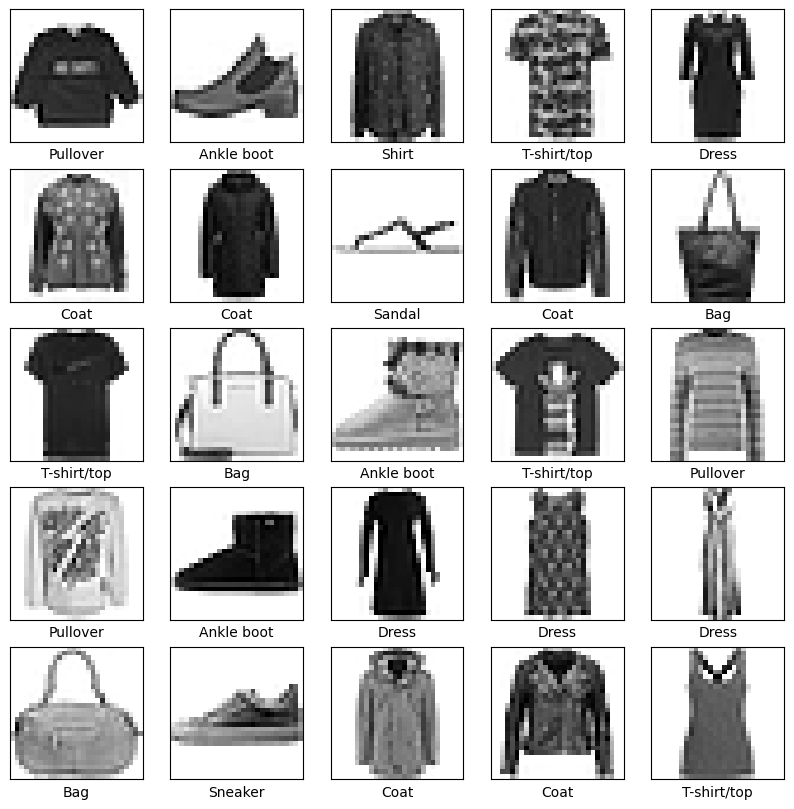

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])

In [19]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout

model = Sequential()

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
# 2D Covolutional Layer
# Each filter is a small matrix that is convolved with the input image to produce a feature map
# features = 64 means the layer will learn 64 different features and kernel_size or filter size is 3*3

model.add(MaxPooling2D(pool_size=(2,2)))
# Max pooling is a downsampling operation to reduce the dimensionality of feature maps and extract the most important features.
# In this case, a pooling window of 2x2 pixels is used.
# During the pooling operation, the maximum value within each 2x2 window of the input feature map is retained,
# while the other values are discarded

model.add(Dropout(rate=0.3))
# Dropout is a regularization technique used to prevent overfitting in neural networks
# by randomly dropping (setting to zero) a fraction of the input units (or neurons) during training.
# In this case, a dropout rate of 0.3 (or 30%) is used,
# meaning that 30% of the input units will be randomly set to zero during each training iteration.

model.add(Flatten())
# The Flatten layer is used to convert the multi-dimensional output of the preceding layer into a one-dimensional vector.
# Flattening is necessary when transitioning from convolutional or pooling layers (which produce 2D or 3D output)
# to fully connected layers (which require 1D input)

model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=10,activation='sigmoid'))
# Sigmoid f(x) = 1/(1+e^x)
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 32)                346144    
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                    

In [10]:
model.fit(x_train,y_train,epochs=50,batch_size=1200,validation_split=0.05)

Epoch 1/50
37/37 [==============================] - 48s 1s/step - loss: 0.9857 - accuracy: 0.6734 - val_loss: nan - val_accuracy: 0.7951
Epoch 2/50
37/37 [==============================] - 39s 1s/step - loss: 0.5148 - accuracy: 0.8171 - val_loss: nan - val_accuracy: 0.8396
Epoch 3/50
37/37 [==============================] - 40s 1s/step - loss: 0.4502 - accuracy: 0.8408 - val_loss: nan - val_accuracy: 0.8479
Epoch 4/50
37/37 [==============================] - 39s 1s/step - loss: 0.4166 - accuracy: 0.8532 - val_loss: nan - val_accuracy: 0.8605
Epoch 5/50
37/37 [==============================] - 38s 1s/step - loss: 0.3922 - accuracy: 0.8629 - val_loss: nan - val_accuracy: 0.8731
Epoch 6/50
37/37 [==============================] - 40s 1s/step - loss: 0.3712 - accuracy: 0.8719 - val_loss: nan - val_accuracy: 0.8758
Epoch 7/50
37/37 [==============================] - 39s 1s/step - loss: 0.3536 - accuracy: 0.8768 - val_loss: nan - val_accuracy: 0.8819
Epoch 8/50
37/37 [=======================

In [11]:
evaluation = model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2424 - accuracy: 0.9159


In [12]:
print(f"Accuracy : {evaluation[1]}")

Accuracy : 0.9158999919891357


In [14]:
y_probabilities = model.predict(x_test)
y_pred = y_probabilities.argmax(axis=-1)
# Take the maximum probability out of all class predicted probabilities

313/313 [==============================] - 3s 10ms/step


In [15]:
y_pred

array([0, 1, 2, ..., 8, 8, 1])

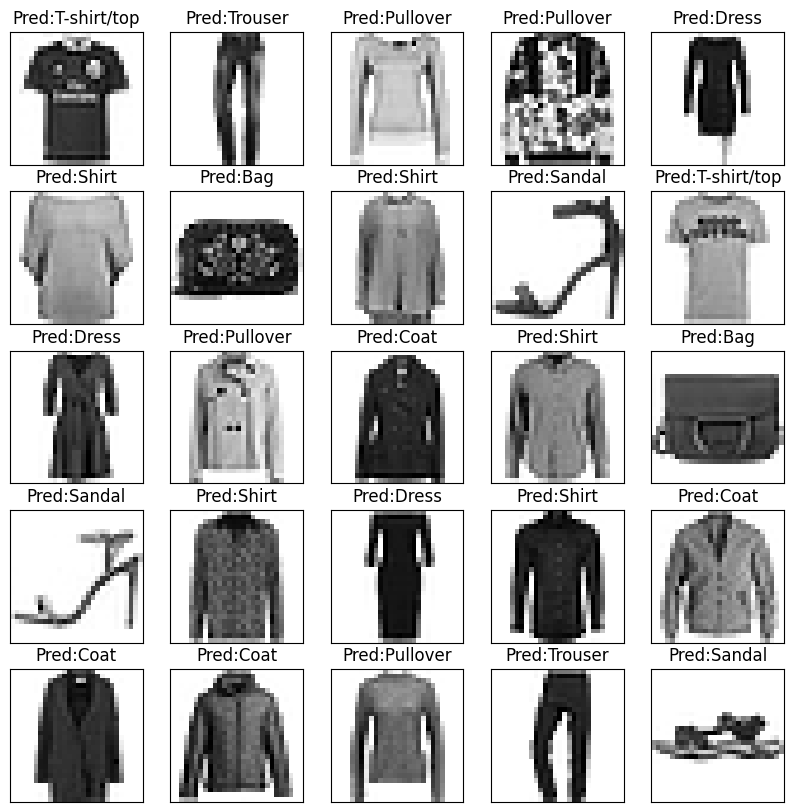

In [16]:
plt.figure(figsize=(10,10),)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i], cmap=plt.cm.binary)
#     plt.xlabel(f"True Class:{y_test[i]}")
    plt.title(f"Pred:{class_names[y_pred[i]]}")
plt.show()

In [17]:
from sklearn.metrics import classification_report

num_classes = 10
class_names = ["class {}".format(i) for i in range(num_classes)]
cr = classification_report(y_test, y_pred, target_names=class_names)
print(cr) #Or simply just do cr=classification_report(y_test,y_pred) and print it.

              precision    recall  f1-score   support

     class 0       0.87      0.85      0.86      1000
     class 1       0.99      0.98      0.98      1000
     class 2       0.88      0.86      0.87      1000
     class 3       0.91      0.94      0.92      1000
     class 4       0.89      0.87      0.88      1000
     class 5       0.98      0.97      0.98      1000
     class 6       0.75      0.78      0.76      1000
     class 7       0.95      0.97      0.96      1000
     class 8       0.98      0.97      0.98      1000
     class 9       0.97      0.95      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

